## Load modules and parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.models import Sequential

## PARAMETERS ##
batch_size = 256
n_epochs = 3000
seq_len = 60
rnn_nodes = 10
################

Using Theano backend.


## GENERATE DATA
    [1, 0, 1, 1, 0, 1] --> [1, 1, 2, 3, 3, 4]

In [2]:
def generate_batch(n=batch_size):
    X = np.random.choice(a=[0, 1], size = n*seq_len, p=[0.9, 0.1]).reshape(n, -1)
    y = np.cumsum(X, axis=1)
    X = X.reshape(n, -1, 1)
    y = y.reshape(n, -1, 1)
    return(X, y)
# generate_batch(1)

## Build Architecture

In [4]:
model = Sequential()
model.add(LSTM(rnn_nodes, input_shape=(seq_len, 1), return_sequences=True))
model.add(Dense(1))
%time model.compile(loss='mse', optimizer='adam')

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.05 ms


## Train

(0, 14.74012553691864)
(100, 0.12725116871297359)
(200, 0.067730294191278517)
(300, 0.01262118062004447)
(400, 0.0050134308985434473)
(500, 0.0020019819639855996)
(600, 0.0031031396792968735)
(700, 0.00090731525415321812)
(800, 0.0062628257874166593)
(900, 0.0068372261594049633)
(1000, 0.0014717327285325155)
(1100, 0.00053177970403339714)
(1200, 0.0010901249697781168)
(1300, 0.00047772234393050894)
(1400, 0.00020067266632395331)
(1500, 0.00034748323378153145)
(1600, 0.00027083548957307357)
(1700, 0.00023926259382278658)
(1800, 0.00074065131775569171)
(1900, 0.00013466980271914508)
(2000, 0.00086540965276071802)
(2100, 0.00042470281914575025)
(2200, 0.00081075238267658278)
(2300, 0.00066752879502018914)
(2400, 0.00077406960190273821)
(2500, 0.00011197373805771349)
(2600, 0.00041326506470795721)
(2700, 0.001021855445287656)
(2800, 0.0013700068084290251)
(2900, 6.8115146405034466e-05)


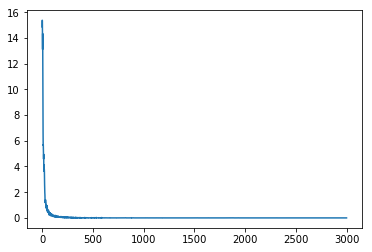

In [5]:
history = []
# from tqdm import trange
# iters = trange(n_epochs)
for i in range(n_epochs):
    X, y = generate_batch()
    hist = model.fit(X, y, verbose=0, epochs=1)
    history.extend(hist.history['loss'])
    if i%100 == 0:
        print(i, model.evaluate(X, y, verbose=0))
#         iters.set_description(str(np.mean(history[-10:])))
plt.plot(history)

## Predict

In [6]:
x, y = generate_batch(1000)
y_pred = np.round(model.predict(x))
# print(np.squeeze(x), '\n'*2, np.squeeze(y_pred))
print(np.mean(np.absolute(np.squeeze(y - y_pred))))

0.0
